<a href="https://colab.research.google.com/github/AHappyCPU/Astro1221/blob/main/MilkyWayRotationCurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import astropy.units as u
import astropy.constants as ac


In [2]:
import matplotlib.pyplot as plt

In [3]:
from google.colab import files

In [5]:
upload = files.upload() # Uploads a datafile

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006.txt


In [6]:
import astropy.io.ascii

In [7]:
table = astropy.io.ascii.read("galaxy_rotation_2006.txt") # Gives computer access to the datafile

In [ ]:
# col2: distance from galactic center from the location in kiloparsecs col3: rotational velocity col4: uncertainty

In [10]:
table

col1,col2,col3,col4
float64,float64,float64,float64
25.0,5.68,235.5,17.8
30.0,6.81,242.9,0.8
35.0,7.95,251.1,0.7
40.0,9.08,262.0,2.1
45.0,10.22,258.9,6.9
50.0,11.35,255.1,5.7
55.0,12.49,251.8,17.1
60.0,13.62,252.1,7.4
65.0,14.76,251.0,18.6


In [12]:
distance = table['col2'] # Names array of distance, which contains all of column 2
velocity = table['col3'] # Names array of velocity, which contains all of column 3

(0.0, 300.0)

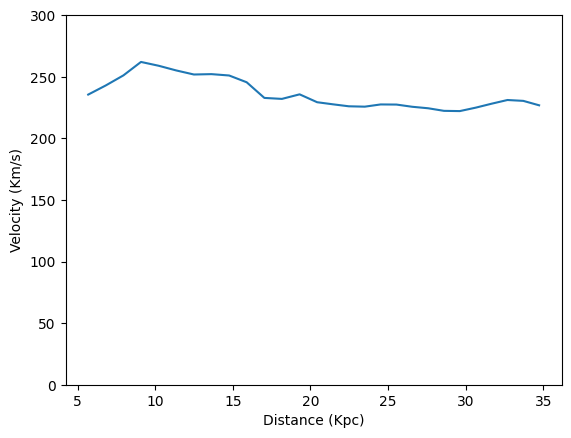

In [16]:
plt.plot(distance, velocity) # Sets up x-y line graph of distance and velocity
plt.xlabel("Distance (Kpc)") # Labels x values distance
plt.ylabel("Velocity (Km/s)") # Labels y values velocity
plt.ylim(0,300) # Sets scale

In [17]:
print(distance)

 col2
-----
 5.68
 6.81
 7.95
 9.08
10.22
11.35
12.49
13.62
14.76
15.89
  ...
24.52
25.54
26.56
27.58
 28.6
29.62
30.65
31.67
32.69
33.71
34.73
Length = 28 rows


$V = \sqrt{\frac{MG}{r}}$

In [ ]:
# In this case, G is the gravitational constant, M is the mass of the supermassive black hole, and r is the distance between the hole and the body


In [19]:
def calculate_orbital_velocity(mass, radius): # Defines the calculation in terms of its imput values
  return (np.sqrt(ac.G * mass/radius)) # Sets up the calculation and assigns it a name

We can show an example using a sattellite orbiting the Earth.

In [20]:
mass = 1 * u.earthMass # Defines mass
radius = 1 * u.earthRad # Defines radius
orb_vel = calculate_orbital_velocity(mass, radius) # Applies calculation
print(orb_vel.to(u.km/u.s)) # Displays result

7.905388234385281 km / s


In [36]:
vel_bh = np.zeros(np.shape(distance)) * u.km/u.s
# Creates a velocity array with the same number of elements as the distance array

for i, radius in enumerate(distance): # Sets up an index function, ennumerates each row of the distance array
  rad = radius * 1000 * u.parsec # Give radius values units
  orb_vel = calculate_orbital_velocity(mass, rad) # Applies the orbital velocity calculation to all array values using stored mass and radius values
  vel_bh[i] = orb_vel # Ensures that the velocity indices have the same formatting, links names

  print(i, "The orbital velocity at", rad, "Kpc", orb_vel.to(u.km/u.s)) # Displays result

0 The orbital velocity at 5680.0 pc Kpc 1.5080627911962298e-06 km / s
1 The orbital velocity at 6810.0 pc Kpc 1.3772730090241908e-06 km / s
2 The orbital velocity at 7950.0 pc Kpc 1.2747059945073634e-06 km / s
3 The orbital velocity at 9080.0 pc Kpc 1.1927534137615838e-06 km / s
4 The orbital velocity at 10220.0 pc Kpc 1.1242635863659443e-06 km / s
5 The orbital velocity at 11350.0 pc Kpc 1.0668310854263338e-06 km / s
6 The orbital velocity at 12490.0 pc Kpc 1.0169799090324708e-06 km / s
7 The orbital velocity at 13620.0 pc Kpc 9.738790842262063e-07 km / s
8 The orbital velocity at 14760.0 pc Kpc 9.355142641370876e-07 km / s
9 The orbital velocity at 15890.0 pc Kpc 9.016368309247075e-07 km / s
10 The orbital velocity at 17030.0 pc Kpc 8.70936052309981e-07 km / s
11 The orbital velocity at 18160.0 pc Kpc 8.434040271542199e-07 km / s
12 The orbital velocity at 19300.0 pc Kpc 8.181160973531268e-07 km / s
13 The orbital velocity at 20430.0 pc Kpc 7.951689425077225e-07 km / s
14 The orbital

<function matplotlib.pyplot.legend(*args, **kwargs)>

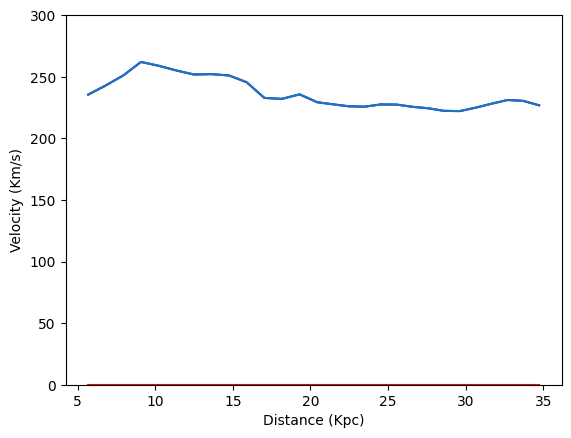

In [38]:
dis = table["col2"]
vel = table ["col3"]
plt.plot(dis, vel, color = "blue", label = "Data" ) # This changes the color of the actual galactic orbital velocity graph to blue and names it Data
plt.plot(dis, vel_bh.value, color = "red", label = "Black Hole" ) # This changes the color of the black hole orbital velocity graph to red and labels it black hole
plt.plot(distance, velocity) # This plots an x-y line graph of distance and velocity
plt.xlabel("Distance (Kpc)") # This writes and displays an x-axis label
plt.ylabel("Velocity (Km/s)") # This writes and displays a y-axis label
plt.ylim(0,300) # This changes the graph scaling
plt.legend # This displays the legend

